In [1]:
from sail.core import VMSetup, registersafeobj,login,connect,pushsafeobj,querydata,get_fns
from sail.data import RemoteDataFrame, Utils
from sail.algo import fdxgb
import time
start_time = time.time()

In [2]:
import json, requests
soPath = "/Development/Milestone3/EndPointTools/SafeObjectEditor/KPMG/safeobjects"
contractdict = [{"DigitalContractGuid":"{327D1DC7-8235-4DE8-9F64-AD79D5545407}"}, {"DigitalContractGuid":"{33A6ADFE-7C3E-44E5-9D6E-28CA231B0B7D}"}]
backendIP = "52.150.26.47"

registersafeobj(soPath)
print("[P]safe objects registered")

[P]safe objects registered


In [3]:
eosb = login("r@r.r", "SailPassword@123", 6200, backendIP)
print("[P]login success")
print(eosb)

[P]login success
5iEQAhtloSMWB3Q07u85Mz2EdXKVkCM0hDNYINmrLjZ3pWNoz0St5jJEQaycIpcatAuB+w0DAADgJxVdJygdwGjFOdjsQNr0JWR20QIdhVHQ4EJDoSFZ6rBewrgBLFDtec28Y+aL1y+L5ANJYN3hZYYTWvYjXnn+Y/N1Pxg2wlh7GAAyUpIK8HM0isq1+p2FEW+EZFYuEnsydH1CDRJn9LjTLINLDDHg0gFHQTUd2cD7kqIBajmjthsQVFZUQCtOYOA8QINJWGR2YdpSXVR0/qbBCmDzD8CIMSgkZNgO0RUfIpPha1aOnMBCRUSgCz1mVpOAUNbKoFnap2feBzUpimPPbVQFX0rpj2HYt2HQUNo7ndayHyLmsItxQ07DxxH5L9moiv/AtZBFJyM25uB8KB7cN+km35jI0CjZnAIbMPOjipyOCc4usJhMTXjKFxoQ5SSRSU1LnXVj1zpqLDAQtZLHuSzr1p5Zhs6oDbFAlFb7SoRHPiG20IsaRTZXRS50Jzlhlsgrm97KfEFiw4k9xWLQAMgKndUhsdr/5gFI3Ns53hMDxBhC1CnM7Q9PqYc9wF1g/71YSGDaXDYQ9x95lN0oU/WwiFnpM33Q1558PUz9xU+nuR9FA0WkO6pyddgBfR+AQ1CKXqvTLZeDvlQ4lESWTHksM5W5Gl37pVRUK1NB8fs2KaxheHwRyoA2hVQPQxiHeuNxIaud6A/TcH9Xb2Qx+yj71fQvg/+FSDFSz9S/4mWec3J+wv+CZn7sZ1e0CBBSNaevkH27NLXmXcdogvqj9f0dQqnSGjML1r1kaRSw65kVzd8/4OllhFasF3sC+XkMfQ5UeKXXL1yOOIJ8lQOEr0nXor/tykzFPgsEOXSTrtvUE64HDJLh/Dvss1G8n/llHtPU1o27q73J64NNbDMC0w0jxcJUvnOJiLyO5ibvCxV9ash4OUJ3MskA7oTELoDb5FbzRxTKBTOj950qQ7R

In [4]:
url = "https://"+backendIP+":6200/SAIL/VirtualMachineManager/GetRunningVMsIpAdresses?Eosb="+eosb

payloads = []
for item in contractdict:
    temp = json.dumps(item)
    payloads.append(temp)

headers = {
    'Content-Type': 'application/json'
}

ips = []
for payload in payloads:
    print(payload)
    response = requests.request("GET", url, headers=headers, data=payload, verify=False)
    response = response.json()
    print(response)
    for key in response['VirtualMachines']:
        ips.append(response['VirtualMachines'][key])
        print(ips)

{"DigitalContractGuid": "{327D1DC7-8235-4DE8-9F64-AD79D5545407}"}


/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '52.150.26.47'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


{'Status': 200.0, 'VirtualMachines': {'D1CA7F981313438A8454AF252387ACD0': '20.120.20.85'}}
['20.120.20.85']
{"DigitalContractGuid": "{33A6ADFE-7C3E-44E5-9D6E-28CA231B0B7D}"}
{'Status': 200.0, 'VirtualMachines': {'FE4A042169234A72AA9D3B4FD0743062': '20.124.225.129'}}
['20.120.20.85', '20.124.225.129']


/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '52.150.26.47'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [5]:
vmids = []
for ip in ips:
    vmid = connect(ip, 3500)
    vmids.append(vmid)
print("[P]virtual machine connection to ip: {0} success".format(ip), flush=True)
    
fns = get_fns()
for vm in vmids:
    for key in fns:
        pushsafeobj(vm, fns[key])
print("[P]safe object pushed to virtual machines" , flush=True)

table = []
for vm in vmids:
    tableid = querydata(vm)
    table.append(tableid)
print("[P]obtain table ids", flush=True)

[P]virtual machine connection to ip: 20.124.225.129 success
[P]safe object pushed to virtual machines
[P]obtain table ids


In [6]:
table

[{'Telco1_split_1': 'F49CBDE2C8B685499CF1563D107683C4'},
 {'Telco1_split_2': '723857D0F2593848BB1714A2869CFAF1'}]

In [7]:
mid_time = time.time()


u1 = Utils(vmids[0], fns)
u2 = Utils(vmids[1], fns)
df1 = u1.read_csv(table[0]['Telco1_split_1'])
df2 = u2.read_csv(table[1]['Telco1_split_2'])
dfs = [df1, df2]

print(time.time() - mid_time)

8.009493827819824


In [8]:
dfs

['{5D21D00E-D873-4C52-800C-F53A69F8D808}.5C37473C6D3443F49C03CAF0D746B997',
 '{0FC853C3-F639-41DD-9C9C-E484ABE164D3}.5C37473C6D3443F49C03CAF0D746B997']

In [9]:
n=2
data1 = RemoteDataFrame(vmids[0], df1, fns)
data2 = RemoteDataFrame(vmids[1], df2, fns)
data = [data1, data2]

In [10]:
data

In [11]:
dtypes = data1.dtypes
type_dict = dict(dtypes)
cate_labels = [key for key in type_dict if type_dict[key] in ['bool', 'object']]
cate_labels.remove('phone number')

In [12]:
cols = []
cols.append(data1.columns)
cols.append(data2.columns)

In [13]:
y=[]
X=[]
n=2
for i in range(n):
    if 'phone number' in cols[i]:
        data[i].data_id = data[i].drop('phone number', axis = 1)
    data[i].data_id = data[i].label_encode(cate_labels)
    y.append(data[i]['churn'])
    X.append(data[i].drop('churn', axis = 1))

In [14]:
cols[0]

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [15]:
y_new = []
for item in y:
    y_new.append(item.data_id)
y=y_new
y

['{66106D43-B7E2-4E38-B1C0-885970AC3327}.048E16B349F8450694B1B30E0E49E6CE',
 '{E82A2489-FDEC-41CF-A161-6C2008A4315F}.048E16B349F8450694B1B30E0E49E6CE']

In [16]:
# !pip3 install optuna

In [17]:
import statistics
import optuna

def objective(trial, fdxgbmod, X, y, dim):
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import auc
    import numpy as np
    
    #trial partameter values
    max_depth = trial.suggest_int('max_depth', 6, 10, step=2)
    n_estimators = trial.suggest_int('n_estimators', 1, 3, step=1)
    learning_rate = trial.suggest_uniform('learning_rate', 0, 1)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0, 1)
    colsample_bylevel = trial.suggest_uniform('colsample_bylevel', 0, 1)


    
    model_params = {
        "colsample_bylevel": colsample_bylevel,
        "colsample_bytree": colsample_bytree,
        "gamma": 1e-09,
        "learning_rate": learning_rate,
        "max_delta_step": 20,
        "max_depth": max_depth,
        "n_estimators": n_estimators,
        "reg_alpha": 6.8398027190415516e-06,
        "reg_lambda": 100.0,
        "subsample": 1.0,
        "scale_pos_weight": 1.0
        }
    
    fdxgbmod.params =  model_params
    fdxgbmod.feature_num =  dim


    #train the a new model
    model = fdxgbmod.fit(X, y)
    
    #evaluate the model in terms of accuracy
    results =  fdxgbmod.aucpr_score(model, X, y)
    precision = results[0][0]
    recall = results[0][2]
    
    recall = np.append(recall, [1])    
    
    #calculate area under curve
    auc_precision_recall = auc(recall, precision)

    #return area under curve
    return auc_precision_recall

In [18]:
dim = len(cols[0])-2
study = optuna.create_study(direction="maximize")
fdxgbmod = fdxgb(vmids, feature_num=dim)

n=3
study.optimize(lambda trial: objective(trial, fdxgbmod, X, y, dim), n_trials=n)

[I 2021-11-23 02:00:01,838] A new study created in memory with name: no-name-64e1c30d-191d-44a8-88a6-e5e1c081d43f


all_hashes has len 3332
all_counters has len 3332
1
[02:00:12] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1


[I 2021-11-23 02:00:20,421] Trial 0 finished with value: 0.4758513644390211 and parameters: {'max_depth': 8, 'n_estimators': 1, 'learning_rate': 0.7943406243780516, 'colsample_bytree': 0.16319489007854504, 'colsample_bylevel': 0.07466403806792987}. Best is trial 0 with value: 0.4758513644390211.


all_hashes has len 3332
all_counters has len 3332
1
[02:00:30] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3


[I 2021-11-23 02:00:50,989] Trial 1 finished with value: 0.5225113736051712 and parameters: {'max_depth': 8, 'n_estimators': 3, 'learning_rate': 0.24233243161503337, 'colsample_bytree': 0.41748741453463656, 'colsample_bylevel': 0.22881077932561267}. Best is trial 1 with value: 0.5225113736051712.


all_hashes has len 3332
all_counters has len 3332
1
[02:01:01] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1


[I 2021-11-23 02:01:09,575] Trial 2 finished with value: 0.5417772012363007 and parameters: {'max_depth': 10, 'n_estimators': 1, 'learning_rate': 0.9726713084023217, 'colsample_bytree': 0.33010482552471665, 'colsample_bylevel': 0.6074102644745367}. Best is trial 2 with value: 0.5417772012363007.


In [19]:
!pip install plotly==5.4.0

<ipython-input-20-686ac4863f55>:3: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)


array([<AxesSubplot:xlabel='colsample_bylevel', ylabel='Objective Value'>,
       <AxesSubplot:xlabel='colsample_bytree'>,
       <AxesSubplot:xlabel='learning_rate'>,
       <AxesSubplot:xlabel='max_depth'>,
       <AxesSubplot:xlabel='n_estimators'>], dtype=object)

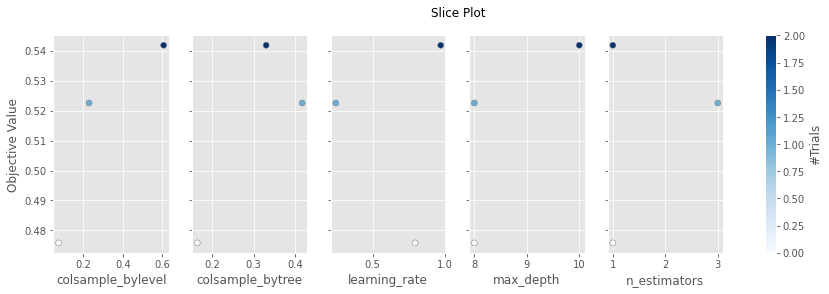

In [20]:
import plotly

optuna.visualization.matplotlib.plot_slice(study)